## Importing the required libraries

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import sys
import regex as re


Importing the data from chess.com API.

In [299]:
username = input("Enter your Chess.com\'s username: ")
year = (input('Enter Year: '))
month = (input('Enter month number in two digits: '))

#for testing

# username = 'Sierra-7'
# year = '2024'
# month = '02'


def import_data(username, year, month):

    header = {
    'Accept' : 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Encoding' : 'gzip, deflate, br, zstd',
    'Accept-Language' : 'en-US,en;q=0.5',
    'Alt-Used' : 'api.chess.com',
    'Connection' : 'keep-alive',
    'Host' : 'api.chess.com',
    'If-Modified-Since' : 'Tuesday, 02-Sep-2025 13:25:23 GMT+0000',
    'If-None-Match' : 'W/"3766242209d6e25999f8023d981eac80"',
    'Priority' : 'u=0, i',
    'Sec-Fetch-Dest' : 'document',
    'Sec-Fetch-Mode' : 'navigate',
    'Sec-Fetch-Site' : 'none',
    'Sec-Fetch-User' : '?1',
    'Sec-GPC' : '1',
    'Upgrade-Insecure-Requests' : '1',
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:141.0) Gecko/20100101 Firefox/141.0'
    }
    response = requests.get(f"https://api.chess.com/pub/player/{username}/games/{year}/{month}", headers= header)
    if response.status_code == 200:
        print('Data Fetched Successfully')
        return response
    elif response.status_code == 404:
        print(f'Invalid input (maybe you entered wrong username, year, or month number)')
    else:
        print(f'Error code: {response.status_code}')

result = import_data(username, year, month)

Data Fetched Successfully


The json function converts the json text data into a python dictionary and store it in the data variable.

In [300]:
data = result.json()
data.keys()

all_games_list = data['games'] # A list that contains values of games key in the data dict.
if len(all_games_list) > 0:
    print(f'Data found for {len(all_games_list)} games.\n\n')
    print(f'Here is a sample of a pgn file \n\n{all_games_list[0]['pgn']}') #A sample pgn file.
else:
    print(f'No games found for this month.')
    sys.exit('Analysis ended as no games found')

Data found for 114 games.


Here is a sample of a pgn file 

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2024.02.01"]
[Round "-"]
[White "Rohit25012004"]
[Black "Sierra-7"]
[Result "1/2-1/2"]
[CurrentPosition "8/8/4Q3/5p1k/5P2/1B3N1P/7P/4K1R1 b - -"]
[Timezone "UTC"]
[ECO "B01"]
[ECOUrl "https://www.chess.com/openings/Scandinavian-Defense"]
[UTCDate "2024.02.01"]
[UTCTime "08:30:40"]
[WhiteElo "642"]
[BlackElo "574"]
[TimeControl "600"]
[Termination "Game drawn by stalemate"]
[StartTime "08:30:40"]
[EndDate "2024.02.01"]
[EndTime "08:45:25"]
[Link "https://www.chess.com/game/live/100515158513"]

1. e4 {[%clk 0:09:59]} 1... d5 {[%clk 0:09:58]} 2. d3 {[%clk 0:09:51.7]} 2... e5 {[%clk 0:09:50.7]} 3. Nc3 {[%clk 0:09:45.3]} 3... d4 {[%clk 0:09:48.3]} 4. Nb5 {[%clk 0:09:10.7]} 4... Bb4+ {[%clk 0:09:28]} 5. c3 {[%clk 0:09:05.6]} 5... dxc3 {[%clk 0:09:21.9]} 6. bxc3 {[%clk 0:09:02.5]} 6... Bc5 {[%clk 0:09:13.4]} 7. d4 {[%clk 0:08:59.7]} 7... exd4 {[%clk 0:09:12.3]} 8. cxd4 {[%clk 0:08:58.7]

# Seperating different game types.
There are different modes of chess games in Chess.com like rapid, blitz, bullet, daily or even custom modes. Each of these have diffrerent time control like 1 minute, 3 minutes and 10 minutes. For every mode of the game a player has different rating, so to make the analysis fair we need to analyze games of same mode together and not all games. That's we are separating the different types of games in different lists.

In [301]:
def game_type():
    bullet_games_list = []
    blitz_games_list = []
    rapid_games_list = []
    daily_games_list = []
    other_games_list = []
    for i in range(len(all_games_list)):

        if ('TimeControl "600"' in all_games_list[i]['pgn'] or 
            'TimeControl "900+10"' in all_games_list[i]['pgn'] or 
            'TimeControl "1800"' in all_games_list[i]['pgn'] or 
            'TimeControl "600+5"' in all_games_list[i]['pgn'] or 
            'TimeControl "1200"' in all_games_list[i]['pgn'] or 
            'TimeControl "3600"' in all_games_list[i]['pgn']):

            rapid_games_list.append(all_games_list[i])

        elif ('TimeControl "180"' in all_games_list[i]['pgn'] or 
              'TimeControl "180+2"' in all_games_list[i]['pgn'] or
              'TimeControl "300"' in all_games_list[i]['pgn'] or 
              'TimeControl "300+2"' in all_games_list[i]['pgn'] or 
              'TimeControl "300+5"' in all_games_list[i]['pgn']):
            
            blitz_games_list.append(all_games_list[i])

        elif ('TimeControl "60"' in all_games_list[i]['pgn'] or 
              'TimeControl "60+1"' in all_games_list[i]['pgn'] or 
              'TimeControl "120+1"' in all_games_list[i]['pgn']):
            
            bullet_games_list.append(all_games_list[i])

        elif 'TimeControl "1/' in all_games_list[i]['pgn']:

            daily_games_list.append(all_games_list[i])

        else:
            other_games_list.append(all_games_list[i])

    return bullet_games_list, blitz_games_list, rapid_games_list, daily_games_list, other_games_list

bullet_games_list, blitz_games_list, rapid_games_list, daily_games_list, other_games_list = game_type()


Defining a function that will extract the data from the pgn and store it in a dict variable named game_info.

In [302]:
def extract_pgn_data(pgn):
    list_pgn = pgn.split('\n')
    game_info = {}
    

    for line in list_pgn:
        if 'White ' in line:
            White = line.split('"')[1]
            game_info['White username:'] = White
        elif 'Black ' in line:
            Black = line.split('"')[1]
            game_info['Black username:'] = Black
        elif 'WhiteElo' in line:
            WhiteElo = line.split('"')[1]
            game_info['White\'s Elo:'] = WhiteElo
        elif 'BlackElo' in line:
            BlackElo = line.split('"')[1]
            game_info['Black\'s Elo:'] = BlackElo
        elif 'Result ' in line:
            result = line.split('"')[1]
            game_info['Result:'] = result
        elif 'Date' in line:
            Date = line.split('"')[1]
            game_info['Date:'] = Date
        elif 'ECOUrl' in line and 'EndDate' not in line and 'UTCDate' not in line:
            Opening_url = line.split('"')[1]
            Opening = Opening_url.split('/')[4]
            Opening_simplified = re.split(r'-\d+', Opening)[0]
            game_info['Opening:'] = Opening_simplified
        elif 'Termination' in line:
            Termination = line.split('"')[1]
            Termination = Termination.split(" ")[-1]
            game_info['Termination:'] = Termination
    
    return game_info

Creating a list to store games data extracted from pgn.

In [303]:
def extract_games(games_list, game_type = 'total'):
    games = []
    for i in range(len(games_list)):
        game_pgn = games_list[i]['pgn']
        games.append(extract_pgn_data(game_pgn))
    print(f"Extracted data for {game_type} {len(games)} games")
    return games


all_games = extract_games(all_games_list)
rapid_games = extract_games(rapid_games_list, 'rapid')
blitz_games = extract_games(blitz_games_list, 'blitz')
bullet_games = extract_games(bullet_games_list, 'bullet')
daily_games = extract_games(daily_games_list, 'daily')
other_games = extract_games(other_games_list, 'other')


Extracted data for total 114 games
Extracted data for rapid 108 games
Extracted data for blitz 6 games
Extracted data for bullet 0 games
Extracted data for daily 0 games
Extracted data for other 0 games


## For now let's do the analysis for rapid games.
Rapid mode is the most popular mode that's why we are doing rapid analysis, but you can change this to other game types too.

In [304]:
df = pd.DataFrame(rapid_games)

df['My color:'] = np.where(df['White username:'] == username, 'White', 'Black')

df['My result:'] = np.where(
    df['Result:'] == '1/2-1/2', 'Draw', 
    np.where(
        ((df['Result:'] == '1-0') & (df['My color:'] == 'White')) | 
        ((df['Result:'] == '0-1') & (df['My color:'] == 'Black')), 
        'Win', 'Loss'))

df

,Date:,White username:,Black username:,Result:,Opening:,White's Elo:,Black's Elo:,Termination:,My color:,My result:
0,2024.02.01,Rohit25012004,Sierra-7,1/2-1/2,Scandinavian-Defense,642,574,stalemate,Black,Draw
1,2024.02.03,Sierra-7,Martinsrex,1-0,Scandinavian-Defense-Closed,582,573,abandoned,White,Win
2,2024.02.03,Sierra-7,hacker_YT54,1/2-1/2,Philidor-Defense,581,518,stalemate,White,Draw
3,2024.02.03,sorin6410,Sierra-7,1-0,Scandinavian-Defense,542,572,resignation,Black,Loss
4,2024.02.03,Sierra-7,DXufreP,0-1,Bishops-Opening,564,626,checkmate,White,Loss
...,...,...,...,...,...,...,...,...,...,...
103,2024.02.26,Sierra-7,kcetask,0-1,Bishops-Opening,611,491,checkmate,White,Loss
104,2024.02.28,Sierra-7,pompythewayo,1-0,Kings-Pawn-Opening,621,693,checkmate,White,Win
105,2024.02.28,raminkondor,Sierra-7,0-1,Kings-Pawn-Opening,545,627,checkmate,Black,Win
106,2024.02.28,Sierra-7,dec0ntrol,1-0,Bishops-Opening-Berlin-Ponziani-Gambit,635,603,checkmate,White,Win


In [305]:
# Extract your rating and opponent's rating
df['My Elo:'] = np.where(df['White username:'] == username, df['White\'s Elo:'], df['Black\'s Elo:'])
df['Opponent\'s Elo:'] = np.where(df['Black username:'] == username, df['White\'s Elo:'], df['Black\'s Elo:'])

# Convert ratings to integers
df['My Elo:'] = df['My Elo:'].astype('int64')
df['White\'s Elo:'] = df['White\'s Elo:'].astype('int64')
df['Black\'s Elo:'] = df['Black\'s Elo:'].astype('int64')
df['Opponent\'s Elo:'] = df['Opponent\'s Elo:'].astype('int64')

# Extract opponent's username
df['Opponent\'s username:'] = np.where(df['My color:'] == 'White', df['Black username:'], df['White username:'])

# Calculate rating difference 
df['Elo Difference:'] = df['Opponent\'s Elo:'] - df['My Elo:'] # +ve number means opponent's rating is higher than you, -ve number means opponent's rating is lower than you

# Create separate DataFrames for different results
Wins = df[df['My result:'] == 'Win']
Loss = df[df['My result:'] == 'Loss']
Draw = df[df['My result:'] == 'Draw']

# Add game tracking columns
df['Game Number:'] = range(1, len(df)+1)
df['cumulative_wins'] = (df['My result:'] == 'Win').cumsum()
df['running_win_rate'] = (df['cumulative_wins'] / df['Game Number:'] * 100)
df


,Date:,White username:,Black username:,Result:,Opening:,White's Elo:,Black's Elo:,Termination:,My color:,My result:,My Elo:,Opponent's Elo:,Opponent's username:,Elo Difference:,Game Number:,cumulative_wins,running_win_rate
0,2024.02.01,Rohit25012004,Sierra-7,1/2-1/2,Scandinavian-Defense,642,574,stalemate,Black,Draw,574,642,Rohit25012004,68,1,0,0.000000
1,2024.02.03,Sierra-7,Martinsrex,1-0,Scandinavian-Defense-Closed,582,573,abandoned,White,Win,582,573,Martinsrex,-9,2,1,50.000000
2,2024.02.03,Sierra-7,hacker_YT54,1/2-1/2,Philidor-Defense,581,518,stalemate,White,Draw,581,518,hacker_YT54,-63,3,1,33.333333
3,2024.02.03,sorin6410,Sierra-7,1-0,Scandinavian-Defense,542,572,resignation,Black,Loss,572,542,sorin6410,-30,4,1,25.000000
4,2024.02.03,Sierra-7,DXufreP,0-1,Bishops-Opening,564,626,checkmate,White,Loss,564,626,DXufreP,62,5,1,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2024.02.26,Sierra-7,kcetask,0-1,Bishops-Opening,611,491,checkmate,White,Loss,611,491,kcetask,-120,104,51,49.038462
104,2024.02.28,Sierra-7,pompythewayo,1-0,Kings-Pawn-Opening,621,693,checkmate,White,Win,621,693,pompythewayo,72,105,52,49.523810
105,2024.02.28,raminkondor,Sierra-7,0-1,Kings-Pawn-Opening,545,627,checkmate,Black,Win,627,545,raminkondor,-82,106,53,50.000000
106,2024.02.28,Sierra-7,dec0ntrol,1-0,Bishops-Opening-Berlin-Ponziani-Gambit,635,603,checkmate,White,Win,635,603,dec0ntrol,-32,107,54,50.467290


## Streak Analysis Function

In [306]:
def find_streaks(results):
    streaks = []
    current_streak = 1
    current_result = results.iloc[0]
    
    for i in range(1, len(results)):
        if results.iloc[i] == current_result:
            current_streak += 1
        else:
            streaks.append((current_result, current_streak))
            current_result = results.iloc[i]
            current_streak = 1
    
    streaks.append((current_result, current_streak))
    return streaks

streaks = find_streaks(df['My result:'])

win_streaks = [length for result, length in streaks if result == 'Win']
loss_streaks = [length for result, length in streaks if result == 'Loss']
draw_streaks = [length for result, length in streaks if result == 'Draw']




## Analysis Function

In [ ]:
def analysis_report(df):


    print(f"=== Hello, {username} ===\n")
    print(f'Number of games played in the month: {df['My Elo:'].count()}\n')
    print(f"Your Average Elo of the month is: {df['My Elo:'].mean().__trunc__()}\n")
    print(f'Your Max Elo of the month is: {df['My Elo:'].max()}\n')
    print(f'Your Min Elo of the month is: {df['My Elo:'].min()}\n')


    idx = Wins['Opponent\'s Elo:'].idxmax()
    print(f'Your Best Win was against user: {Wins['Opponent\'s username:'][idx]} with the Elo of :{Wins['Opponent\'s Elo:'][idx]}\n')


    print(f'Your Win rate: {len(Wins)/len(df):.2%}\n')

    color = df.groupby('My color:')['My result:'].apply(lambda x: (x == 'Win').mean())
    print(f'Win Rate with different colors: \n{color*100}\n')

    df['Opponent\'s Strength:'] = pd.cut(df['Elo Difference:'], 
                                        bins=[-np.inf, -100, -20, 20, 100, np.inf], 
                                        labels=['Much Weaker', 'Weaker', 'Similar', 'Stronger', 'Much Stronger'])
    a = df.groupby('Opponent\'s Strength:', observed=True)['My result:'].apply(lambda x: (x =='Win').mean())


    print(f'Win Rate according to the opponent\'s strength {a*100}\n')


    print(f'Rating change over this month: {df['My Elo:'].iloc[-1] - df['My Elo:'].iloc[0]}\n')


    print(f"Longest Win streak: {max(win_streaks) if win_streaks else 0}")
    print(f"Longest Loss streak: {max(loss_streaks) if loss_streaks else 0}")
    print(f"Longest Draw streak: {max(draw_streaks) if draw_streaks else 0}")

In [317]:
print(f'===RAPID GAMES ANALYSIS===\n')
analysis_report(df)


===RAPID GAMES ANALYSIS===

=== Hello Sierra-7 ===

Number of games played in the month: 108

Your Average Elo of the month is: 633

Your Max Elo of the month is: 665

Your Min Elo of the month is: 564

Your Best Win was against user: coolermasterdeep with the Elo of :768

Your Win rate: 50.93%

Win Rate with different colors: 
My color:
Black    50.000000
White    51.851852
Name: My result:, dtype: float64

Win Rate according to the opponent's strength Opponent's Strength:
Much Weaker      75.000000
Weaker           59.375000
Similar          75.000000
Stronger         31.428571
Much Stronger    11.111111
Name: My result:, dtype: float64

Rating change over this month: 68

Longest Win streak: 5
Longest Loss streak: 4
Longest Draw streak: 2


# Let's do some visualizaton.

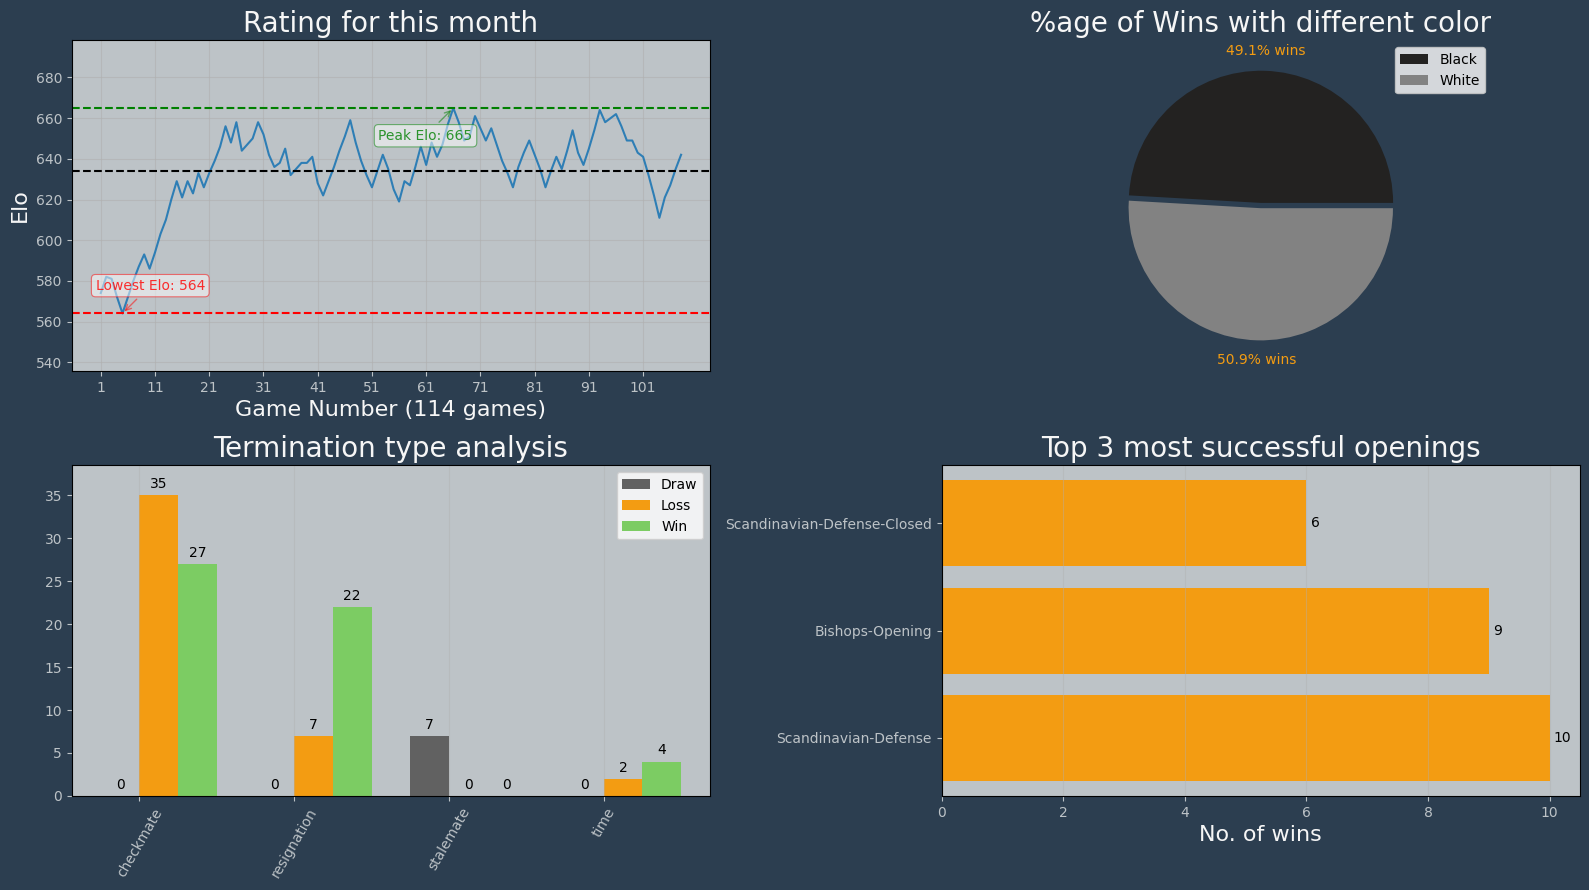

In [312]:
fig, axes = plt.subplots(2, 2, figsize= (16, 9), layout= 'tight', facecolor= '#2c3e50')

# First chart.

def annotate_safely(ax, x_val, y_val, label, color='black'):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Decide horizontal offset: left if x_val > mid_x, else right
    offset_x = -20 if x_val > (xlim[0] + xlim[1]) / 2 else 20
    # Decide vertical offset: down if y_val > mid_y, else up
    offset_y = -20 if y_val > (ylim[0] + ylim[1]) / 2 else 20

    ax.annotate(
        label,
        xy=(x_val, y_val),
        xytext=(offset_x, offset_y),
        textcoords='offset points',
        ha='center',
        va='center',
        color=color,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=0.8, alpha= 0.5),
        arrowprops=dict(arrowstyle='->', color=color, alpha = 0.5), alpha = 0.8
    )


axes[0,0].plot('Game Number:', 'My Elo:', data=df, alpha=0.9)
axes[0,0].set_xlabel(f'Game Number ({len(all_games)} games)', fontsize=16, color="#f6f6f6")
axes[0,0].set_ylabel('Elo', fontsize=16, color="#f6f6f6")
axes[0,0].set_xticks(range(1, len(rapid_games_list), 10))
axes[0,0].set_title("Rating for this month", fontsize=20, color="#f6f6f6")
axes[0,0].axhline(y=df['My Elo:'].min(), c='r', linestyle='--')
axes[0,0].axhline(y=df['My Elo:'].max(), c='g', linestyle='--')
axes[0,0].axhline(y=df['My Elo:'].mean(), c='black', linestyle='--')
axes[0,0].set_ylim(min(df['My Elo:']) * 0.95, max(df['My Elo:']) * 1.05)
axes[0,0].set_facecolor('#bdc3c7')

max_index = df['My Elo:'].idxmax()
min_index = df['My Elo:'].idxmin()

annotate_safely(axes[0,0], df['Game Number:'][max_index], df['My Elo:'][max_index],
                f'Peak Elo: {df["My Elo:"][max_index]}', color='green')

annotate_safely(axes[0,0], df['Game Number:'][min_index], df['My Elo:'][min_index],
                f'Lowest Elo: {df["My Elo:"][min_index]}', color='red')

axes[0,0].grid(alpha=0.6)


# Second Chart.

col_func = df.groupby('My color:')['My result:'].apply(lambda x: (x == 'Win').mean())

wedges, texts, autotexts = axes[0,1].pie(col_func, autopct= '%1.1f%% wins', explode= (0.02, 0.02), colors=["#232221", "#828282"], pctdistance= 1.15)
axes[0,1].set_title('%age of Wins with different color', fontsize= 20, color= "#f6f6f6")
axes[0,1].legend(labels= ['Black', 'White'], loc = 0, bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
axes[0,1].set_facecolor('#bdc3c7')

for autotext in autotexts:
    autotext.set_color('#f39c12')

# Third Chart.

termination_count = df.groupby(['Termination:']).size()
significant_termination_count = termination_count[termination_count>=5].index
filtered_df = df[df['Termination:'].isin(significant_termination_count)]
filtered_df = filtered_df.groupby(['Termination:', 'My result:']).size().unstack(fill_value=0)


x = np.arange(len(filtered_df.values))
width = 0.25
multiplier = 0
colors = pd.Series(["#616161",'#f39c12', '#7ccc63'], index=filtered_df.columns)
for i in filtered_df.columns:
    offset = width*multiplier
    rects = axes[1,0].bar(x + offset, filtered_df[i], width, color= colors[i])
    multiplier+=1
    axes[1,0].bar_label(rects, padding=3)

axes[1,0].set_xticks(x + width / 2, filtered_df.index, rotation=60, color= "#f6f6f6")
axes[1,0].legend(labels=filtered_df.columns)
axes[1,0].xaxis.grid(alpha= 0.4)
axes[1,0].set_title('Termination type analysis', fontsize= 20, color= "#f6f6f6")
axes[1,0].set_facecolor('#bdc3c7')
axes[1,0].set_ylim(0, max(filtered_df.values.flatten()) * 1.1)

# Fourth Chart.

a = Wins.groupby('Opening:').size()
frequent_openings = a.nlargest(3)

bars = axes[1,1].barh(frequent_openings.index, frequent_openings.values, color= '#f39c12')
axes[1,1].set_title('Top 3 most successful openings', fontsize= 20, color= "#f6f6f6")
axes[1,1].set_xlabel('No. of wins', fontsize= 16, color= "#f6f6f6")
axes[1,1].xaxis.grid(alpha= 0.4)
axes[1,1].set_facecolor('#bdc3c7')
axes[1,1].bar_label(bars, padding=3)

axes[0,0].tick_params(axis= 'x', colors= '#bdc3c7')
axes[0,0].tick_params(axis= 'y', colors= '#bdc3c7')
axes[1,0].tick_params(axis= 'x', colors= '#bdc3c7')
axes[1,0].tick_params(axis= 'y', colors= '#bdc3c7')
axes[1,1].tick_params(axis= 'x', colors= '#bdc3c7')
axes[1,1].tick_params(axis= 'y', colors= '#bdc3c7')
axes[0,1].tick_params(axis= 'x', colors= '#bdc3c7')
axes[0,1].tick_params(axis= 'y', colors= '#bdc3c7')
plt.show()
